In [107]:
# library use
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
from datetime import timedelta
import datetime as dt
warnings.filterwarnings('ignore')
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import pickle
%config InlineBackend.figure_format = 'retina'
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [79]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [80]:
df = pd.read_csv('original_full_data.csv', index_col = 0)

In [81]:
mmdf = pd.read_csv('bloomberg_map_index_20200130.csv', index_col = 0)

In [83]:
df.head()

,date,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,NFPPCHIndex,USMMMNCHIndex,AWHTOTLIndex,USWHTOTIndex,USEMTOTIndex,USEMNCHGIndex,USERTOTIndex,EMDINP1MIndex,JOLTOPENIndex,JOLTHIRSIndex,JOLTSEPSIndex,CHALYOY%Index,ADPCHNGIndex,USHEYOYIndex,USHETOT%Index,ECIYOYIndex,COSTNFR%Index,PRODNFR%Index,IPYOYIndex,IPCHNGIndex,CPTICHNGIndex,TMNOCHNGIndex,DGNOYOYIndex,DGNOCHNGIndex,MTIBCHNGIndex,MWINCHNGIndex,MGT2TBIndex,MGT2MAIndex,MGT2WHIndex,MGT2WHDUIndex,MGT2REIndex,IPIndex,MTSLRL$Index,AGWHTOTLIndex,NFPTIndex,PIDSPINXIndex,NAPMPMIIndex,NAPMNMIIndex,NAPMPRICIndex,MPMIUSCAIndex,MPMIUSMAIndex,MPMIUSSAIndex,CFNAIIndex,CFNAIMA3Index,OUTFGAFIndex,EMPRGBCIIndex,RCHSINDXIndex,CHPMINDXIndex,MAPMINDXIndex,OEUSKLARIndex,OEUSKLAPIndex,LEITOTLIndex,LEIYOYIndex,LEICHNGIndex,LEIAVGWIndex,LEIWKIJIndex,LEINWCNIndex,NAPMNEWOIndex,LEIMNOIndex,LEIBPIndex,LEISTKPIndex,LEILCIIndex,LEIIRTEIndex,LEIACEIndex,RSTAMOMIndex,RSTAXMOMIndex,RSTAYOYIndex,RSTAXYOYIndex,MBRXYOYWIndex,SAARTOTLIndex,SAARDTOTIndex,CONCCONFIndex,CONSSENTIndex,COMFCOMFIndex,COMFBTWRIndex,PITLYOYIndex,PITLCHNGIndex,PCECHY%Index,PCECHNCIndex,PIDSDPSIndex,CICRTOTIndex,EHCAUSIndex,USCABALIndex,USTBTOTIndex,USTBEXPIndex,USTBIMPIndex,USTBEXPYIndex,USTBIMPYIndex,IMP1YOY%Index,IMP1CHNGIndex,FRNTTOTLIndex,FRNTTNETIndex,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,JNVNYOYSIndex,JNVNIYOYIndex,MPMIJPCAIndex,MPMIJPMAIndex,MPMIJPSAIndex,CNGDPYOYIndex,GDPNTTLYIndex,CHEFTYOYIndex,CNPPIYIndex,CPMINDXIndex,CPMINORDIndex,CPMINEXOIndex,CNCILIIndex,CNFREXPYIndex,CNFRIMPYIndex,KOGDPYOYIndex,KOGDPQOQIndex,KOECPRCYIndex,KOECGCPYIndex,KOECGVTYIndex,KOECEXPYIndex,KOECIMPYIndex,KOECSPRQIndex,KOECGCSYIndex,KOECSGVQIndex,KOECSEMQIndex,KOECSIMQIndex,KOECFCOYIndex,KOECFCSYIndex,OEKRN022Index,KOGNICNYIndex,KOGNICUYIndex,KOGCGDPYIndex,KOGCSTOQIndex,KODFTOTYIndex,KOCPIIndex,KOCPIYOYIndex,KOCPIMOMIndex,SKCITTLIndex,SKCIYOYIndex,SKCIMOMIndex,KOCLLNSIndex,KOPPIIndex,KOPPIYOYIndex,KOPPIMOMIndex,KOEAUERSIndex,KOEAEMPYIndex,KOUETTYIndex,KOEAPYIndex,KOEAEPRIndex,KOQEEYOYIndex,KOWDRIndex,KOULMGFIndex,KOULMGFYIndex,KOLPIIndex,KOLPIYIndex,SKLIOTARIndex,KOIPISAIndex,KOIPIYIndex,KOIPIMOMIndex,KOIPMSIndex,KOIPMYIndex,KOIPMSMIndex,KOPSIYIndex,KOPIIYIndex,KOIPMCIndex,KOIPMCYIndex,KOIPOPSMIndex,KOIVCPEYIndex,KOIVCCYIndex,KOIVCONYIndex,KOCGCGYIndex,KOCGCGSMIndex,KOSVTOTYIndex,KOSVTOTMIndex,KOVMPRODIndex,KOBSMCIndex,KOBSNMCIndex,SKBSICIndex,SKBSICSAIndex,MPMIKRMAIndex,OEKRKLARIndex,OEKRKLAPIndex,SKLILIIndex,SKLILYIndex,SKLILCIndex,SKLICIIndex,SKLIINVCIndex,SKLICONEIndex,SKLIMORDIndex,SKLICONTIndex,SKLINBARIndex,SKLISPRCIndex,SKLIINTRIndex,SKLIIPALIndex,SKLICNSTIndex,SKLISVCIIndex,SKLIWNRSIndex,SKLISHPPIndex,SKLIIMPTIndex,SKLIEMPPIndex,SKLILAPIndex,SKLILAIIndex,SKLINEIndex,SKLICPYIndex,KOBONTLIndex,KOHSTRIndex,KOHPTTLIndex,KOHPTYOYIndex,KOHCTTLIndex,KOHCTYOYIndex,KOBLTHMLIndex,KOBLTHMYIndex,KOUHTTLIndex,KORSTIndex,KORSTYIndex,KODSDEPTIndex,KODSDISCIndex,KOVMTOTSIndex,KOVMDOMSIndex,KOVMEXPSIndex,KOCCCSIIndex,KOHOINCIndex,KOHOINCYIndex,KOHEUINYIndex,KOHHDIndex,KOHHDYIndex,KOHHLIndex,KOHHLYIndex,EOKOS002Index,KOBPCBIndex,EHCAKRYIndex,KOBPFINIndex,KOBPCAIndex,KODIBALIndex,KOBPTBIndex,KOTRBALIndex,KOEXTOTIndex,KOIMTOTIndex,KOEXTOTYIndex,KOIMTOTYIndex,KOEXPTIIndex,KOEXPTIYIndex,KOEXPTIMIndex,KOIMPTIIndex,KOIMPTIYIndex,KOIMPTIMIndex,KOFDITIndex,KOFDITYIndex,KOELTOTIndex,KOGFBALIndex,KOGFTEXPIndex,KOGFTRIndex,G7BBKOREIndex,GDDBSOKOIndex,KOMSMBYIndex,KOMSM1YIndex,KOMSM2YIndex,KOMSM3YIndex,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,AppliedMaterials_vo

In [84]:
df = df.loc[9132 :, :]

In [85]:
df.reset_index(drop = True, inplace = True)

In [86]:
# 제대로 Column 들이 박혀있는 Dataframe이 들어오는 클래스
class Builder:

    def __init__(self, input_df, map_df):
        self.df = input_df
        self.mdf = map_df
        self.lag_days = [1, 7, 30, 90, 180, 365] # lagging day variation
        self.target_day = 1


    # df should involve datetime index

    def targeter(self, target_column):
        self.df[target_column] = self.df[target_column].shift(-1*int(self.target_day))

        return self.df

    def returner(self, target_column):      

        col_name =  []
        # creating new column name
        for i in self.lag_days:
            col_name.append(target_column + str(i))
        # appending lagged columns
        for i, j in enumerate(self.lag_days):
            self.df[locals()['col_name'][i]] = self.df[target_column] / self.df[target_column].shift(periods = j, axis = 0)

        return self.df 


    
    def differ(self, target_column):

        col_name = []
        for i in self.lag_days:
            col_name.append(target_column + str(i))
        for i, j in enumerate(self.lag_days):
            self.df[locals()['col_name'][i]] = self.df[target_column] - self.df[target_column].shift(periods = j, axis = 0)
        return self.df

    # volume * close  -> convert to return 
    # 안타깝게도 mdf 에 있는 이름은 '주가'_close 의 형태가 되어야 함
    def producter(self, target_column):

        col_name = (str(target_column).split('_'))[0]# j가 들어오면 이걸 받고         
        # 해당 함수 내부에 col_name을 넣으면 해당 j가 들어가서 product와 결합된 column 생성

        self.df[locals()['col_name'] + '_product'] = self.df[col_name + '_volume'] * self.df[col_name + '_close'] # j volume과 j close를 곱해서 

        return self.df
    
    
    def execution(self):
        for i, j in enumerate(self.mdf['ticker']): # 키 값들을 순차적으로 돌리면서 순회, 예외사항이 있는지? 아 else를 걸어두면 상관없겠구나. 딱 mdf에 있는 만큼만 반영될듯
            #if self.mdf.loc[i, :][0] in self.df.columns:
            if j in self.df.columns:

                if self.mdf.loc[i, :][1] == 'product': 
                    self.producter(j)
                    col = str(j).split('_')[0]
                    self.df[col + '_product'] = self.df[col + '_product'] / self.df[col + '_product'].shift(1)


                if self.mdf.loc[i, :][1] == 'target': 
                    self.targeter(j)
                    
                    # 여기에서 필요한 것만 남겨야 하는데



                else:
                    pass
            else:
                pass
                
                '''

                if self.mdf.loc[i, :][1] == 'minus':
                    self.differ(j)

                elif self.mdf.loc[i, :][1] == 'change':
                    self.returner(j)

                elif self.mdf.loc[i, :][1] == 'product': #왜 안돌까. Amazon은 되는데. 어딘선가 도는게 멈추는게 분명한데. self.mdf.ticker에서 
                    self.producter(j)
                    # 여기에 product를 return으로 만드는 code 추가

                '''
                #else:
                   # pass
           # else:
            #    pass
            
        return self.df


            
    # 차분에 ACF 그래프도 그리면 좋을듯. 정상성을 나타내지 않는 시계열에서는 ACF가 느리게 감소하고
    # 정상성을 나타내는 시계열에서는 ACF가 비교적 빠르게 0으로 떨어질 것
    # 구글 주식 가격 데이터의 경우 차분을 하면 ACF는 단순히 white noise time series 처럼 생겼음


    # spline이 된 상태에서는 acf를 적용할 수 있다. 
    # cubic spline만 적용한다고 가정하고
    # raw에서 채우지는 않고 acf만 보는 function을 짜자
    def acf_cal(self, target):
        data = pd.DataFrame(self.df[target])
        data = data.interpolate(method = 'cubic', limit_area = 'inside').fillna(method = 'ffill').fillna(method = 'bfill')
        acf = sm.tsa.acf(data)      
        plt.stem(acf)
        plt.show()

In [130]:
newdf = df.copy()

In [131]:
len(newdf.columns)

417

In [132]:
newdf['date'] = pd.to_datetime(newdf['date'])

In [133]:
newdf.set_index('date', inplace = True)

In [134]:
newdf = newdf.interpolate(method = 'cubic', limit_area = 'inside')
newdf = newdf.fillna(method = 'bfill')
newdf = newdf.fillna(method = 'ffill')

In [135]:
len(newdf.columns)

416

In [136]:
newdf.isna().sum().sum()

0

In [137]:
cla = Builder(newdf, mmdf)

In [138]:
cla.execution()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,NFPPCHIndex,USMMMNCHIndex,AWHTOTLIndex,USWHTOTIndex,USEMTOTIndex,USEMNCHGIndex,USERTOTIndex,EMDINP1MIndex,JOLTOPENIndex,JOLTHIRSIndex,JOLTSEPSIndex,CHALYOY%Index,ADPCHNGIndex,USHEYOYIndex,USHETOT%Index,ECIYOYIndex,COSTNFR%Index,PRODNFR%Index,IPYOYIndex,IPCHNGIndex,CPTICHNGIndex,TMNOCHNGIndex,DGNOYOYIndex,DGNOCHNGIndex,MTIBCHNGIndex,MWINCHNGIndex,MGT2TBIndex,MGT2MAIndex,MGT2WHIndex,MGT2WHDUIndex,MGT2REIndex,IPIndex,MTSLRL$Index,AGWHTOTLIndex,NFPTIndex,PIDSPINXIndex,NAPMPMIIndex,NAPMNMIIndex,NAPMPRICIndex,MPMIUSCAIndex,MPMIUSMAIndex,MPMIUSSAIndex,CFNAIIndex,CFNAIMA3Index,OUTFGAFIndex,EMPRGBCIIndex,RCHSINDXIndex,CHPMINDXIndex,MAPMINDXIndex,OEUSKLARIndex,OEUSKLAPIndex,LEITOTLIndex,LEIYOYIndex,LEICHNGIndex,LEIAVGWIndex,LEIWKIJIndex,LEINWCNIndex,NAPMNEWOIndex,LEIMNOIndex,LEIBPIndex,LEISTKPIndex,LEILCIIndex,LEIIRTEIndex,LEIACEIndex,RSTAMOMIndex,RSTAXMOMIndex,RSTAYOYIndex,RSTAXYOYIndex,MBRXYOYWIndex,SAARTOTLIndex,SAARDTOTIndex,CONCCONFIndex,CONSSENTIndex,COMFCOMFIndex,COMFBTWRIndex,PITLYOYIndex,PITLCHNGIndex,PCECHY%Index,PCECHNCIndex,PIDSDPSIndex,CICRTOTIndex,EHCAUSIndex,USCABALIndex,USTBTOTIndex,USTBEXPIndex,USTBIMPIndex,USTBEXPYIndex,USTBIMPYIndex,IMP1YOY%Index,IMP1CHNGIndex,FRNTTOTLIndex,FRNTTNETIndex,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,JNVNYOYSIndex,JNVNIYOYIndex,MPMIJPCAIndex,MPMIJPMAIndex,MPMIJPSAIndex,CNGDPYOYIndex,GDPNTTLYIndex,CHEFTYOYIndex,CNPPIYIndex,CPMINDXIndex,CPMINORDIndex,CPMINEXOIndex,CNCILIIndex,CNFREXPYIndex,CNFRIMPYIndex,KOGDPYOYIndex,KOGDPQOQIndex,KOECPRCYIndex,KOECGCPYIndex,KOECGVTYIndex,KOECEXPYIndex,KOECIMPYIndex,KOECSPRQIndex,KOECGCSYIndex,KOECSGVQIndex,KOECSEMQIndex,KOECSIMQIndex,KOECFCOYIndex,KOECFCSYIndex,OEKRN022Index,KOGNICNYIndex,KOGNICUYIndex,KOGCGDPYIndex,KOGCSTOQIndex,KODFTOTYIndex,KOCPIIndex,KOCPIYOYIndex,KOCPIMOMIndex,SKCITTLIndex,SKCIYOYIndex,SKCIMOMIndex,KOCLLNSIndex,KOPPIIndex,KOPPIYOYIndex,KOPPIMOMIndex,KOEAUERSIndex,KOEAEMPYIndex,KOUETTYIndex,KOEAPYIndex,KOEAEPRIndex,KOQEEYOYIndex,KOWDRIndex,KOULMGFIndex,KOULMGFYIndex,KOLPIIndex,KOLPIYIndex,SKLIOTARIndex,KOIPISAIndex,KOIPIYIndex,KOIPIMOMIndex,KOIPMSIndex,KOIPMYIndex,KOIPMSMIndex,KOPSIYIndex,KOPIIYIndex,KOIPMCIndex,KOIPMCYIndex,KOIPOPSMIndex,KOIVCPEYIndex,KOIVCCYIndex,KOIVCONYIndex,KOCGCGYIndex,KOCGCGSMIndex,KOSVTOTYIndex,KOSVTOTMIndex,KOVMPRODIndex,KOBSMCIndex,KOBSNMCIndex,SKBSICIndex,SKBSICSAIndex,MPMIKRMAIndex,OEKRKLARIndex,OEKRKLAPIndex,SKLILIIndex,SKLILYIndex,SKLILCIndex,SKLICIIndex,SKLIINVCIndex,SKLICONEIndex,SKLIMORDIndex,SKLICONTIndex,SKLINBARIndex,SKLISPRCIndex,SKLIINTRIndex,SKLIIPALIndex,SKLICNSTIndex,SKLISVCIIndex,SKLIWNRSIndex,SKLISHPPIndex,SKLIIMPTIndex,SKLIEMPPIndex,SKLILAPIndex,SKLILAIIndex,SKLINEIndex,SKLICPYIndex,KOBONTLIndex,KOHSTRIndex,KOHPTTLIndex,KOHPTYOYIndex,KOHCTTLIndex,KOHCTYOYIndex,KOBLTHMLIndex,KOBLTHMYIndex,KOUHTTLIndex,KORSTIndex,KORSTYIndex,KODSDEPTIndex,KODSDISCIndex,KOVMTOTSIndex,KOVMDOMSIndex,KOVMEXPSIndex,KOCCCSIIndex,KOHOINCIndex,KOHOINCYIndex,KOHEUINYIndex,KOHHDIndex,KOHHDYIndex,KOHHLIndex,KOHHLYIndex,EOKOS002Index,KOBPCBIndex,EHCAKRYIndex,KOBPFINIndex,KOBPCAIndex,KODIBALIndex,KOBPTBIndex,KOTRBALIndex,KOEXTOTIndex,KOIMTOTIndex,KOEXTOTYIndex,KOIMTOTYIndex,KOEXPTIIndex,KOEXPTIYIndex,KOEXPTIMIndex,KOIMPTIIndex,KOIMPTIYIndex,KOIMPTIMIndex,KOFDITIndex,KOFDITYIndex,KOELTOTIndex,KOGFBALIndex,KOGFTEXPIndex,KOGFTRIndex,G7BBKOREIndex,GDDBSOKOIndex,KOMSMBYIndex,KOMSM1YIndex,KOMSM2YIndex,KOMSM3YIndex,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,AppliedMaterials_volume,

In [139]:
newdf = cla.df.fillna(method = 'ffill').fillna(method = 'bfill')

In [140]:
newdf.isna().sum().sum()

0

In [141]:
len(newdf.columns)

442

In [142]:
newdf.isna().sum().sum()

0

# Scaling

In [143]:
newdf.reset_index(inplace = True)

In [144]:
date = newdf.date

In [145]:
newdf.drop('date', axis = True, inplace = True)

In [146]:
y_target = newdf['KRXsemiconductor_change']

In [147]:
# hynix, krx
newdf.drop(['KRXsemiconductor_close',
 'KRXsemiconductor_volume',
 'KRXsemiconductor_change'], axis = 1, inplace = True)

In [148]:
# scaling 하기전에 columns 뽑기 
col_name = newdf.columns

In [149]:
newdf.describe()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,NFPPCHIndex,USMMMNCHIndex,AWHTOTLIndex,USWHTOTIndex,USEMTOTIndex,USEMNCHGIndex,USERTOTIndex,EMDINP1MIndex,JOLTOPENIndex,JOLTHIRSIndex,JOLTSEPSIndex,CHALYOY%Index,ADPCHNGIndex,USHEYOYIndex,USHETOT%Index,ECIYOYIndex,COSTNFR%Index,PRODNFR%Index,IPYOYIndex,IPCHNGIndex,CPTICHNGIndex,TMNOCHNGIndex,DGNOYOYIndex,DGNOCHNGIndex,MTIBCHNGIndex,MWINCHNGIndex,MGT2TBIndex,MGT2MAIndex,MGT2WHIndex,MGT2WHDUIndex,MGT2REIndex,IPIndex,MTSLRL$Index,AGWHTOTLIndex,NFPTIndex,PIDSPINXIndex,NAPMPMIIndex,NAPMNMIIndex,NAPMPRICIndex,MPMIUSCAIndex,MPMIUSMAIndex,MPMIUSSAIndex,CFNAIIndex,CFNAIMA3Index,OUTFGAFIndex,EMPRGBCIIndex,RCHSINDXIndex,CHPMINDXIndex,MAPMINDXIndex,OEUSKLARIndex,OEUSKLAPIndex,LEITOTLIndex,LEIYOYIndex,LEICHNGIndex,LEIAVGWIndex,LEIWKIJIndex,LEINWCNIndex,NAPMNEWOIndex,LEIMNOIndex,LEIBPIndex,LEISTKPIndex,LEILCIIndex,LEIIRTEIndex,LEIACEIndex,RSTAMOMIndex,RSTAXMOMIndex,RSTAYOYIndex,RSTAXYOYIndex,MBRXYOYWIndex,SAARTOTLIndex,SAARDTOTIndex,CONCCONFIndex,CONSSENTIndex,COMFCOMFIndex,COMFBTWRIndex,PITLYOYIndex,PITLCHNGIndex,PCECHY%Index,PCECHNCIndex,PIDSDPSIndex,CICRTOTIndex,EHCAUSIndex,USCABALIndex,USTBTOTIndex,USTBEXPIndex,USTBIMPIndex,USTBEXPYIndex,USTBIMPYIndex,IMP1YOY%Index,IMP1CHNGIndex,FRNTTOTLIndex,FRNTTNETIndex,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,JNVNYOYSIndex,JNVNIYOYIndex,MPMIJPCAIndex,MPMIJPMAIndex,MPMIJPSAIndex,CNGDPYOYIndex,GDPNTTLYIndex,CHEFTYOYIndex,CNPPIYIndex,CPMINDXIndex,CPMINORDIndex,CPMINEXOIndex,CNCILIIndex,CNFREXPYIndex,CNFRIMPYIndex,KOGDPYOYIndex,KOGDPQOQIndex,KOECPRCYIndex,KOECGCPYIndex,KOECGVTYIndex,KOECEXPYIndex,KOECIMPYIndex,KOECSPRQIndex,KOECGCSYIndex,KOECSGVQIndex,KOECSEMQIndex,KOECSIMQIndex,KOECFCOYIndex,KOECFCSYIndex,OEKRN022Index,KOGNICNYIndex,KOGNICUYIndex,KOGCGDPYIndex,KOGCSTOQIndex,KODFTOTYIndex,KOCPIIndex,KOCPIYOYIndex,KOCPIMOMIndex,SKCITTLIndex,SKCIYOYIndex,SKCIMOMIndex,KOCLLNSIndex,KOPPIIndex,KOPPIYOYIndex,KOPPIMOMIndex,KOEAUERSIndex,KOEAEMPYIndex,KOUETTYIndex,KOEAPYIndex,KOEAEPRIndex,KOQEEYOYIndex,KOWDRIndex,KOULMGFIndex,KOULMGFYIndex,KOLPIIndex,KOLPIYIndex,SKLIOTARIndex,KOIPISAIndex,KOIPIYIndex,KOIPIMOMIndex,KOIPMSIndex,KOIPMYIndex,KOIPMSMIndex,KOPSIYIndex,KOPIIYIndex,KOIPMCIndex,KOIPMCYIndex,KOIPOPSMIndex,KOIVCPEYIndex,KOIVCCYIndex,KOIVCONYIndex,KOCGCGYIndex,KOCGCGSMIndex,KOSVTOTYIndex,KOSVTOTMIndex,KOVMPRODIndex,KOBSMCIndex,KOBSNMCIndex,SKBSICIndex,SKBSICSAIndex,MPMIKRMAIndex,OEKRKLARIndex,OEKRKLAPIndex,SKLILIIndex,SKLILYIndex,SKLILCIndex,SKLICIIndex,SKLIINVCIndex,SKLICONEIndex,SKLIMORDIndex,SKLICONTIndex,SKLINBARIndex,SKLISPRCIndex,SKLIINTRIndex,SKLIIPALIndex,SKLICNSTIndex,SKLISVCIIndex,SKLIWNRSIndex,SKLISHPPIndex,SKLIIMPTIndex,SKLIEMPPIndex,SKLILAPIndex,SKLILAIIndex,SKLINEIndex,SKLICPYIndex,KOBONTLIndex,KOHSTRIndex,KOHPTTLIndex,KOHPTYOYIndex,KOHCTTLIndex,KOHCTYOYIndex,KOBLTHMLIndex,KOBLTHMYIndex,KOUHTTLIndex,KORSTIndex,KORSTYIndex,KODSDEPTIndex,KODSDISCIndex,KOVMTOTSIndex,KOVMDOMSIndex,KOVMEXPSIndex,KOCCCSIIndex,KOHOINCIndex,KOHOINCYIndex,KOHEUINYIndex,KOHHDIndex,KOHHDYIndex,KOHHLIndex,KOHHLYIndex,EOKOS002Index,KOBPCBIndex,EHCAKRYIndex,KOBPFINIndex,KOBPCAIndex,KODIBALIndex,KOBPTBIndex,KOTRBALIndex,KOEXTOTIndex,KOIMTOTIndex,KOEXTOTYIndex,KOIMTOTYIndex,KOEXPTIIndex,KOEXPTIYIndex,KOEXPTIMIndex,KOIMPTIIndex,KOIMPTIYIndex,KOIMPTIMIndex,KOFDITIndex,KOFDITYIndex,KOELTOTIndex,KOGFBALIndex,KOGFTEXPIndex,KOGFTRIndex,G7BBKOREIndex,GDDBSOKOIndex,KOMSMBYIndex,KOMSM1YIndex,KOMSM2YIndex,KOMSM3YIndex,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,AppliedMaterials_volume,

In [150]:
# 삼성전자의 데이터가 infinity를 포함하고 있는 오류 발견

In [151]:
newdf.drop('SamsungElectronics_product', inplace = True, axis = 1) # 왜 삼성전자가 infinity가 뜰까??

In [152]:
# scaling과 동시에 변환
newdf = PowerTransformer().fit_transform(newdf)
#newdf = StandardScaler().fit_transform(newdf)
#newdf = newdf.apply(lambda x : np.log1p(x))
#df = MinMaxScaler().fit_transfrom(df)

In [153]:
newdf

array([[ 2.34251891,  1.6270214 ,  1.70445139, ..., -0.0038442 ,
        -0.06421649, -0.00823801],
       [ 2.34251891,  1.6270214 ,  1.70445139, ..., -0.0038442 ,
        -0.06421649, -0.00823801],
       [ 2.34251891,  1.6270214 ,  1.70445139, ..., -0.0038442 ,
        -0.24772051, -0.07705145],
       ...,
       [-0.14580855, -0.13495849,  0.45387169, ...,  0.01718786,
         0.65621564,  0.22548127],
       [-0.14580855, -0.13495849,  0.45387169, ...,  0.09764754,
        -0.17021707, -0.11281534],
       [-0.14580855, -0.13495849,  0.45387169, ...,  0.06779429,
         0.21169576,  0.24510071]])

In [154]:
col_name=col_name.drop('SamsungElectronics_product')

In [155]:
newdf = pd.DataFrame(newdf, columns = col_name)

In [156]:
newdf.describe()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCUR$Index,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,INJCJCIndex,INJCSPIndex,NFPTCHIndex,NFPPCHIndex,USMMMNCHIndex,AWHTOTLIndex,USWHTOTIndex,USEMTOTIndex,USEMNCHGIndex,USERTOTIndex,EMDINP1MIndex,JOLTOPENIndex,JOLTHIRSIndex,JOLTSEPSIndex,CHALYOY%Index,ADPCHNGIndex,USHEYOYIndex,USHETOT%Index,ECIYOYIndex,COSTNFR%Index,PRODNFR%Index,IPYOYIndex,IPCHNGIndex,CPTICHNGIndex,TMNOCHNGIndex,DGNOYOYIndex,DGNOCHNGIndex,MTIBCHNGIndex,MWINCHNGIndex,MGT2TBIndex,MGT2MAIndex,MGT2WHIndex,MGT2WHDUIndex,MGT2REIndex,IPIndex,MTSLRL$Index,AGWHTOTLIndex,NFPTIndex,PIDSPINXIndex,NAPMPMIIndex,NAPMNMIIndex,NAPMPRICIndex,MPMIUSCAIndex,MPMIUSMAIndex,MPMIUSSAIndex,CFNAIIndex,CFNAIMA3Index,OUTFGAFIndex,EMPRGBCIIndex,RCHSINDXIndex,CHPMINDXIndex,MAPMINDXIndex,OEUSKLARIndex,OEUSKLAPIndex,LEITOTLIndex,LEIYOYIndex,LEICHNGIndex,LEIAVGWIndex,LEIWKIJIndex,LEINWCNIndex,NAPMNEWOIndex,LEIMNOIndex,LEIBPIndex,LEISTKPIndex,LEILCIIndex,LEIIRTEIndex,LEIACEIndex,RSTAMOMIndex,RSTAXMOMIndex,RSTAYOYIndex,RSTAXYOYIndex,MBRXYOYWIndex,SAARTOTLIndex,SAARDTOTIndex,CONCCONFIndex,CONSSENTIndex,COMFCOMFIndex,COMFBTWRIndex,PITLYOYIndex,PITLCHNGIndex,PCECHY%Index,PCECHNCIndex,PIDSDPSIndex,CICRTOTIndex,EHCAUSIndex,USCABALIndex,USTBTOTIndex,USTBEXPIndex,USTBIMPIndex,USTBEXPYIndex,USTBIMPYIndex,IMP1YOY%Index,IMP1CHNGIndex,FRNTTOTLIndex,FRNTTNETIndex,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,JNVNYOYSIndex,JNVNIYOYIndex,MPMIJPCAIndex,MPMIJPMAIndex,MPMIJPSAIndex,CNGDPYOYIndex,GDPNTTLYIndex,CHEFTYOYIndex,CNPPIYIndex,CPMINDXIndex,CPMINORDIndex,CPMINEXOIndex,CNCILIIndex,CNFREXPYIndex,CNFRIMPYIndex,KOGDPYOYIndex,KOGDPQOQIndex,KOECPRCYIndex,KOECGCPYIndex,KOECGVTYIndex,KOECEXPYIndex,KOECIMPYIndex,KOECSPRQIndex,KOECGCSYIndex,KOECSGVQIndex,KOECSEMQIndex,KOECSIMQIndex,KOECFCOYIndex,KOECFCSYIndex,OEKRN022Index,KOGNICNYIndex,KOGNICUYIndex,KOGCGDPYIndex,KOGCSTOQIndex,KODFTOTYIndex,KOCPIIndex,KOCPIYOYIndex,KOCPIMOMIndex,SKCITTLIndex,SKCIYOYIndex,SKCIMOMIndex,KOCLLNSIndex,KOPPIIndex,KOPPIYOYIndex,KOPPIMOMIndex,KOEAUERSIndex,KOEAEMPYIndex,KOUETTYIndex,KOEAPYIndex,KOEAEPRIndex,KOQEEYOYIndex,KOWDRIndex,KOULMGFIndex,KOULMGFYIndex,KOLPIIndex,KOLPIYIndex,SKLIOTARIndex,KOIPISAIndex,KOIPIYIndex,KOIPIMOMIndex,KOIPMSIndex,KOIPMYIndex,KOIPMSMIndex,KOPSIYIndex,KOPIIYIndex,KOIPMCIndex,KOIPMCYIndex,KOIPOPSMIndex,KOIVCPEYIndex,KOIVCCYIndex,KOIVCONYIndex,KOCGCGYIndex,KOCGCGSMIndex,KOSVTOTYIndex,KOSVTOTMIndex,KOVMPRODIndex,KOBSMCIndex,KOBSNMCIndex,SKBSICIndex,SKBSICSAIndex,MPMIKRMAIndex,OEKRKLARIndex,OEKRKLAPIndex,SKLILIIndex,SKLILYIndex,SKLILCIndex,SKLICIIndex,SKLIINVCIndex,SKLICONEIndex,SKLIMORDIndex,SKLICONTIndex,SKLINBARIndex,SKLISPRCIndex,SKLIINTRIndex,SKLIIPALIndex,SKLICNSTIndex,SKLISVCIIndex,SKLIWNRSIndex,SKLISHPPIndex,SKLIIMPTIndex,SKLIEMPPIndex,SKLILAPIndex,SKLILAIIndex,SKLINEIndex,SKLICPYIndex,KOBONTLIndex,KOHSTRIndex,KOHPTTLIndex,KOHPTYOYIndex,KOHCTTLIndex,KOHCTYOYIndex,KOBLTHMLIndex,KOBLTHMYIndex,KOUHTTLIndex,KORSTIndex,KORSTYIndex,KODSDEPTIndex,KODSDISCIndex,KOVMTOTSIndex,KOVMDOMSIndex,KOVMEXPSIndex,KOCCCSIIndex,KOHOINCIndex,KOHOINCYIndex,KOHEUINYIndex,KOHHDIndex,KOHHDYIndex,KOHHLIndex,KOHHLYIndex,EOKOS002Index,KOBPCBIndex,EHCAKRYIndex,KOBPFINIndex,KOBPCAIndex,KODIBALIndex,KOBPTBIndex,KOTRBALIndex,KOEXTOTIndex,KOIMTOTIndex,KOEXTOTYIndex,KOIMTOTYIndex,KOEXPTIIndex,KOEXPTIYIndex,KOEXPTIMIndex,KOIMPTIIndex,KOIMPTIYIndex,KOIMPTIMIndex,KOFDITIndex,KOFDITYIndex,KOELTOTIndex,KOGFBALIndex,KOGFTEXPIndex,KOGFTRIndex,G7BBKOREIndex,GDDBSOKOIndex,KOMSMBYIndex,KOMSM1YIndex,KOMSM2YIndex,KOMSM3YIndex,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,AppliedMaterials_volume,

In [157]:
len(newdf.columns)

438

In [158]:
for i in newdf.columns:
    if newdf[i].std() == 0:
        newdf.drop(i, axis = 1, inplace = True)

In [159]:
newdf.describe()

,GDPCQOQIndex,GDPCYOYIndex,GDPCTOT%Index,GPDITOC%Index,GPGSTOC%Index,RGCDCIPIIndex,GDPCURYIndex,GDPPIQQIndex,GDPCPCECIndex,CPIYOYIndex,CPIXYOYIndex,PCEDEFYIndex,PCECYOYIndex,CPICHNGIndex,CPUPXCHGIndex,FDIDFDMOIndex,FDIDSGMOIndex,FDIUFDYOIndex,FDIUSGYOIndex,USURTOTIndex,USUDMAERIndex,NFPTCHIndex,NFPPCHIndex,USMMMNCHIndex,AWHTOTLIndex,USWHTOTIndex,USEMNCHGIndex,EMDINP1MIndex,JOLTOPENIndex,JOLTHIRSIndex,JOLTSEPSIndex,CHALYOY%Index,ADPCHNGIndex,USHEYOYIndex,USHETOT%Index,ECIYOYIndex,COSTNFR%Index,PRODNFR%Index,IPYOYIndex,IPCHNGIndex,CPTICHNGIndex,TMNOCHNGIndex,DGNOYOYIndex,DGNOCHNGIndex,MTIBCHNGIndex,MWINCHNGIndex,MGT2TBIndex,MGT2MAIndex,MGT2WHIndex,MGT2WHDUIndex,MGT2REIndex,IPIndex,MTSLRL$Index,NAPMPMIIndex,NAPMNMIIndex,NAPMPRICIndex,MPMIUSCAIndex,MPMIUSMAIndex,MPMIUSSAIndex,CFNAIIndex,CFNAIMA3Index,OUTFGAFIndex,EMPRGBCIIndex,RCHSINDXIndex,CHPMINDXIndex,MAPMINDXIndex,OEUSKLAPIndex,LEITOTLIndex,LEIYOYIndex,LEICHNGIndex,LEIAVGWIndex,LEINWCNIndex,NAPMNEWOIndex,LEIMNOIndex,LEIBPIndex,LEILCIIndex,LEIIRTEIndex,LEIACEIndex,RSTAMOMIndex,RSTAXMOMIndex,RSTAYOYIndex,RSTAXYOYIndex,MBRXYOYWIndex,SAARTOTLIndex,SAARDTOTIndex,CONCCONFIndex,CONSSENTIndex,COMFCOMFIndex,COMFBTWRIndex,PITLYOYIndex,PITLCHNGIndex,PCECHY%Index,PCECHNCIndex,PIDSDPSIndex,CICRTOTIndex,EHCAUSIndex,USCABALIndex,USTBTOTIndex,USTBEXPIndex,USTBIMPIndex,USTBEXPYIndex,USTBIMPYIndex,IMP1YOY%Index,IMP1CHNGIndex,FRNTTOTLIndex,FRNTTNETIndex,FDTRIndex,USGG3MIndex,USGG10YRIndex,USTW$Index,JNVNYOYSIndex,JNVNIYOYIndex,MPMIJPMAIndex,MPMIJPSAIndex,CNGDPYOYIndex,GDPNTTLYIndex,CHEFTYOYIndex,CNPPIYIndex,CPMINDXIndex,CPMINORDIndex,CPMINEXOIndex,CNFREXPYIndex,CNFRIMPYIndex,KOGDPYOYIndex,KOGDPQOQIndex,KOECPRCYIndex,KOECGCPYIndex,KOECGVTYIndex,KOECEXPYIndex,KOECIMPYIndex,KOECSPRQIndex,KOECGCSYIndex,KOECSGVQIndex,KOECSEMQIndex,KOECSIMQIndex,KOECFCOYIndex,KOECFCSYIndex,OEKRN022Index,KOGNICNYIndex,KOGNICUYIndex,KOGCGDPYIndex,KOGCSTOQIndex,KODFTOTYIndex,KOCPIIndex,KOCPIYOYIndex,KOCPIMOMIndex,SKCITTLIndex,SKCIYOYIndex,SKCIMOMIndex,KOCLLNSIndex,KOPPIIndex,KOPPIYOYIndex,KOPPIMOMIndex,KOEAUERSIndex,KOEAEMPYIndex,KOUETTYIndex,KOEAPYIndex,KOEAEPRIndex,KOQEEYOYIndex,KOWDRIndex,KOULMGFYIndex,KOLPIIndex,KOLPIYIndex,SKLIOTARIndex,KOIPISAIndex,KOIPIYIndex,KOIPIMOMIndex,KOIPMSIndex,KOIPMYIndex,KOIPMSMIndex,KOPSIYIndex,KOPIIYIndex,KOIPMCIndex,KOIPMCYIndex,KOIPOPSMIndex,KOIVCPEYIndex,KOIVCCYIndex,KOIVCONYIndex,KOCGCGYIndex,KOCGCGSMIndex,KOSVTOTYIndex,KOSVTOTMIndex,KOVMPRODIndex,KOBSMCIndex,KOBSNMCIndex,SKBSICIndex,SKBSICSAIndex,OEKRKLARIndex,OEKRKLAPIndex,SKLILIIndex,SKLILYIndex,SKLILCIndex,SKLICIIndex,SKLIINVCIndex,SKLICONEIndex,SKLICONTIndex,SKLISPRCIndex,SKLIINTRIndex,SKLIIPALIndex,SKLISVCIIndex,SKLIWNRSIndex,SKLISHPPIndex,SKLIIMPTIndex,SKLIEMPPIndex,SKLILAPIndex,SKLILAIIndex,SKLINEIndex,SKLICPYIndex,KOBONTLIndex,KOHSTRIndex,KOHPTTLIndex,KOHPTYOYIndex,KOHCTTLIndex,KOHCTYOYIndex,KOBLTHMYIndex,KORSTIndex,KORSTYIndex,KODSDEPTIndex,KODSDISCIndex,KOVMTOTSIndex,KOVMDOMSIndex,KOVMEXPSIndex,KOCCCSIIndex,KOHOINCIndex,KOHOINCYIndex,KOHEUINYIndex,KOHHDIndex,KOHHDYIndex,KOHHLIndex,KOHHLYIndex,EOKOS002Index,KOBPCBIndex,EHCAKRYIndex,KOBPFINIndex,KOBPCAIndex,KODIBALIndex,KOBPTBIndex,KOTRBALIndex,KOEXTOTIndex,KOIMTOTIndex,KOEXTOTYIndex,KOIMTOTYIndex,KOEXPTIIndex,KOEXPTIYIndex,KOEXPTIMIndex,KOIMPTIIndex,KOIMPTIYIndex,KOIMPTIMIndex,KOFDITIndex,KOFDITYIndex,KOELTOTIndex,KOGFBALIndex,KOGFTEXPIndex,KOGFTRIndex,G7BBKOREIndex,GDDBSOKOIndex,KOMSMBYIndex,KOMSM1YIndex,KOMSM2YIndex,KOMSM3YIndex,KOMSLYIndex,KOMSM1FYIndex,KOFETOTIndex,KOFETOT%Index,KORP7DIndex,KOCICOBAIndex,KOCICONFIndex,KRBO3MIndex,KWCDCCurncy,GVSK10YRIndex,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,AppliedMaterials_close,AppliedMaterials_volume,AppliedMaterials_change,Aspeed_volume,Aspeed_change,Dell_close,Dell_volume,Dell_change,EUR_KRW_change,Facebook_close,Facebook_volume,Facebook_change,Google_volume,Google_change,HPE_close,HPE_volume,HPE_change,Intel_close,Intel_volume,Intel_change,ISECloudComputin

In [160]:
len(newdf.columns)

407

In [161]:
newdf.isna().sum().sum()

0

In [162]:
# KRX
X_data = newdf.copy()

In [163]:
# random split과 not random split
#X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, shuffle = False)

# Linear Model

In [301]:
lr = LinearRegression()
ridge = Ridge(alpha = 3000)
lasso = Lasso(alpha = 1000)

In [302]:
def get_linear_model_r2score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("model name :", model.__class__.__name__)
    print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
    print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

In [303]:
# 트리 기반 회귀 모델을 반복하며 평가 수행
linear_models = [lr, ridge, lasso]
for model in linear_models:
    get_linear_model_r2score(model, X_train, y_train, X_test, y_test)

model name : LinearRegression
MSE:  55060223.005, RMSE : 7420.258
Variance Score : -15180686.538819
model name : Ridge
MSE:  2.899, RMSE : 1.703
Variance Score : 0.200657
model name : Lasso
MSE:  3.628, RMSE : 1.905
Variance Score : -0.000145


# Tree Model

In [175]:
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 100)
#rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
#gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
#xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 3000)

In [176]:
def get_tree_model_r2score(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("model name :", model.__class__.__name__)
    print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
    print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

In [177]:
# 트리 기반 회귀 모델을 반복하며 평가 수행
tree_models = [dt_reg, lgb_reg]
for model in tree_models:
    get_tree_model_r2score(model, X_train, y_train, X_test, y_test)

model name : DecisionTreeRegressor
MSE:  6.149, RMSE : 2.480
Variance Score : -0.695303
model name : LGBMRegressor
MSE:  3.016, RMSE : 1.737
Variance Score : 0.168373


In [305]:
ridge.fit(X_train, y_train)

Ridge(alpha=3000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [307]:
y_pred = ridge.predict(X_test)

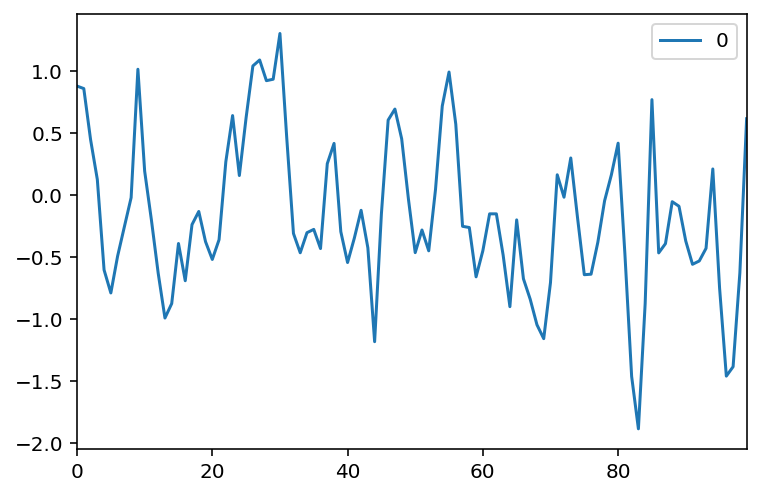

In [312]:
pd.DataFrame(y_pred)[0:100].plot()

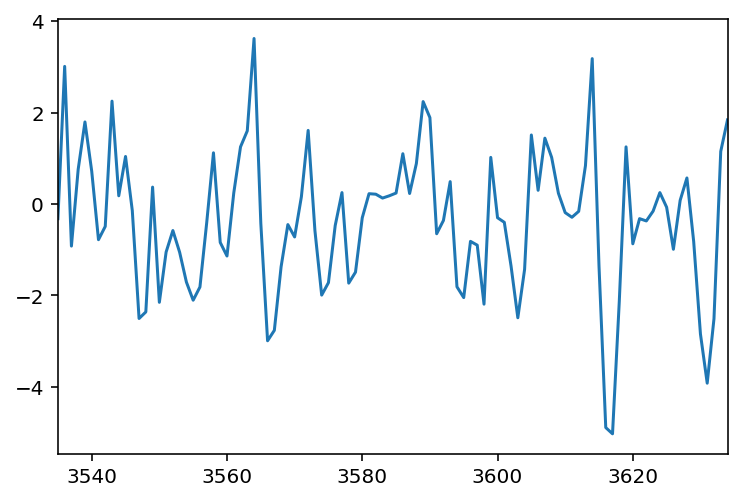

In [313]:
y_test[0:100].plot()

In [44]:
xgb_reg = XGBRegressor(n_estimators = 1000, learning_rate =0.1, max_depth = 100)

In [45]:
xgb_reg.fit(X_train, y_train)

[15:26:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=100, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

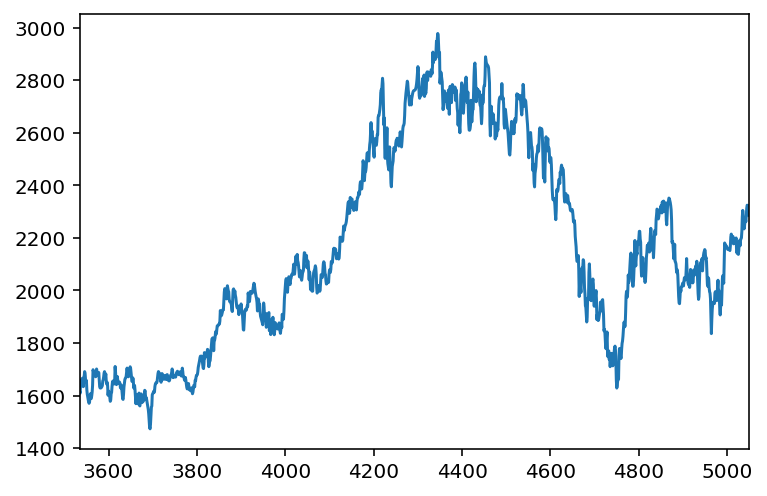

In [46]:
y_test.plot()

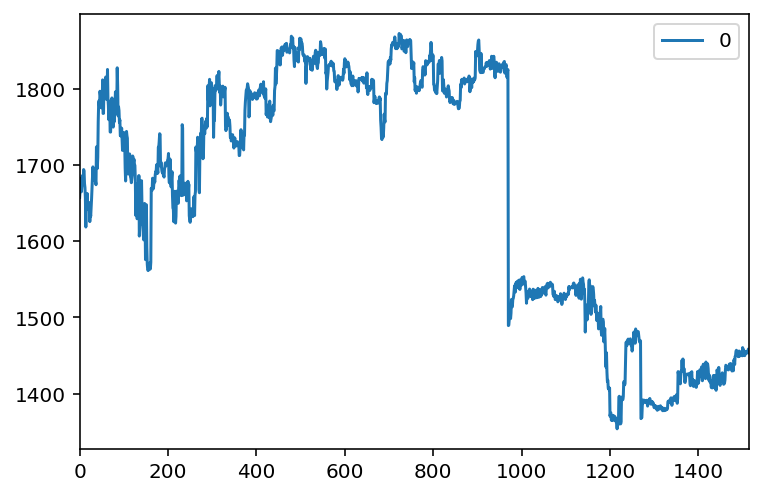

In [47]:
pd.DataFrame(xgb_reg.predict(X_test)).plot()

In [ ]:
lgb_reg = LGBMRegressor(n_estimators = 1000, learning_rate =0.1, max_depth = 100)

In [91]:
lgb_reg.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [221]:
feat_imp = pd.DataFrame(sorted(zip(lgb_reg.feature_importances_, X_train.columns)), columns = ['Value', 'Feature'])

In [1]:
feat_imp.sort_values(by = 'Value', ascending = False)[0]

NameError: name 'feat_imp' is not defined

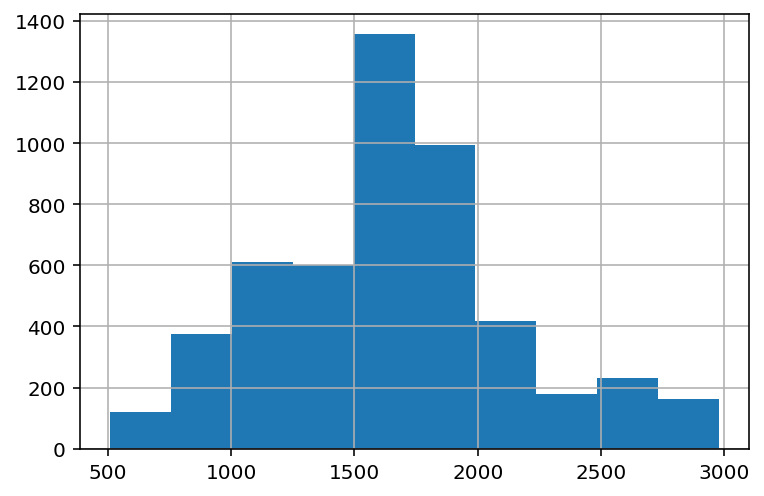

In [61]:
y_target.hist()

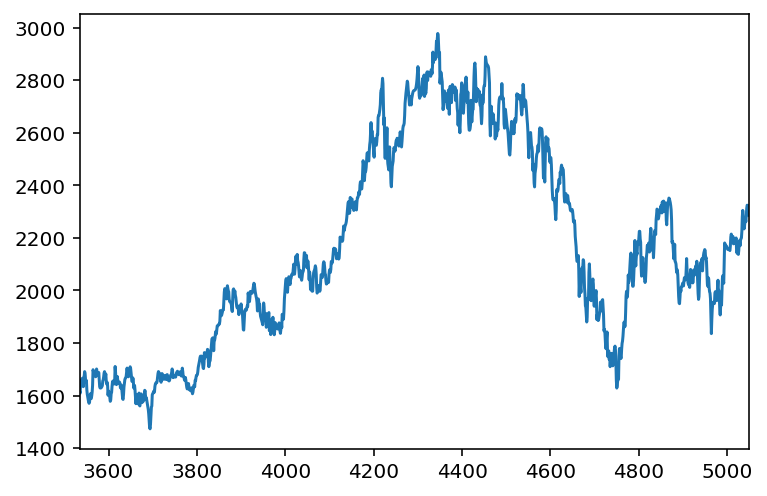

In [97]:
y_test.plot()

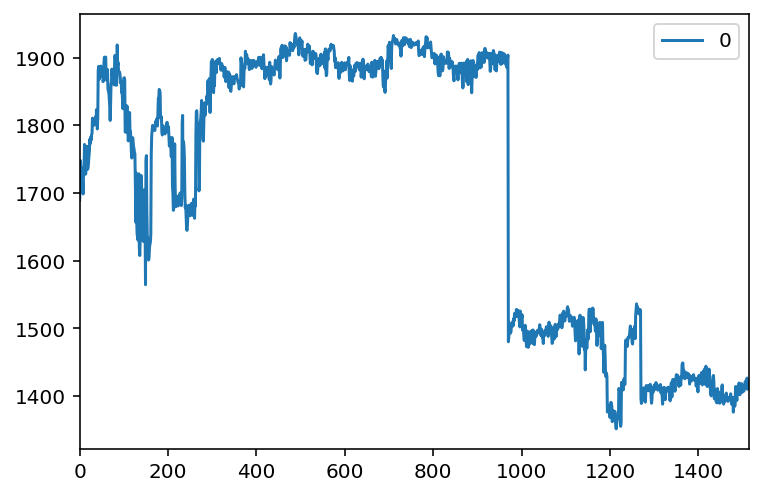

In [96]:
pd.DataFrame(lgb_reg.predict(X_test)).plot()

In [48]:
plt.figure(figsize = (20, 200))
sns.barplot(x = 'Value', y = 'Feature', data = feat_imp.sort_values(by = 'Value', ascending = False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.savefig('lgbm_importances_1.png')
plt.show()


NameError: name 'feat_imp' is not defined

In [ ]:
# threshold 발라내는 코드는 이렇게 구성하면 되겠다 .

def get_outlier(df = None, column = None, weight = 1.5):
    quantile_25 = np.percentile(values, 25)
    quantile_75 = np.percentile(values, 75)
    
    outlier_index = data[( data < quantile25) | (data > quantile75)].index
    return outlier_index

# df.drop(outlier_index, axis = 0, inplace = True)

In [ ]:
# metric 구성

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
